Date Created: 10/10/20
## Goal of Notebook: Create Network of Gene Co-Occurance
Use network to pull out structure

In [1]:
import requests 
import pandas as pd
from random import sample 
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns                                                             
import sys 
from networkx.algorithms import bipartite
from networkx.algorithms.community import greedy_modularity_communities

Create gene co occurance network where states are the "gene identifier" is function of the gene, making NKF genes one node

In [2]:
gene_identifier = "function"

Load in phage dataframes

In [3]:
df_phages = pd.read_csv("data/phage_metadata.csv")
# add filter here
df_phages = df_phages[df_phages["subcluster"] == 'A2']
df_phages.head()

,phage,temperate,cluster,subcluster,morphotype,host genus,host species,genome length,is annotated,is phamerated,gcpercent
0,20ES,True,A,A2,SIPHO,Mycobacterium,smegmatis,53124.0,False,True,63.4
9,AbbyPaige,True,A,A2,SIPHO,Mycobacterium,smegmatis,53225.0,False,True,63.4
23,Acolyte,True,A,A2,SIPHO,Mycobacterium,smegmatis,52668.0,False,True,63.3
41,Adzzy,True,A,A2,SIPHO,Mycobacterium,smegmatis,52519.0,True,True,62.6
47,Agape74,True,A,A2,SIPHO,Mycobacterium,smegmatis,53198.0,False,True,63.4


In [4]:
df_genes = pd.read_csv("data/cleaned_gene_list.csv")
df_genes = df_genes[df_genes["phage"].isin(df_phages["phage"].unique())]
if gene_identifier == "function":
    df_genes = df_genes[df_genes["function"]!="NKF"][df_genes["function"]!="-1"]
df_genes.head()

/Users/skymartin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,gene ID,pham,function,translation,orientation,phage,gene number,uncleaned function
1,20ES_CDS_10,39578,lysin b,MSLQVGSSGELVNRWIRVMKARFASYAGKLKEDGYFGLDDKAVQQE...,F,20ES,10,lysin b
2,20ES_CDS_11,34196,terminase,MSLENHHPELAPSPPHIIGPSWQRTVDGSWHLPDPKMTLGWGVLKW...,F,20ES,11,terminase
3,20ES_CDS_12,39511,portal protein,MTAPLPGQEEIPDPAIARDEMISAFDDAVKNLKINTSYYEAERRPE...,F,20ES,12,portal protein
4,20ES_CDS_13,21454,capsid maturation protease,MITAAVAAYVQRFASMFTGPALSLGEWARFLQTLFPEVQRRYAQAA...,F,20ES,13,capsid maturation protease
5,20ES_CDS_14,8023,scaffolding protein,MGSTTMPRRRKHMSDTATDTPAGTPAPEATPPADSTPKMFDEAYVK...,F,20ES,14,scaffold protein


# Gene Co-Occurrence Network

Create gene co occurance network. Undirected networks, nodes are genes and edge between i - j represents that i and j appear in at least one genome. Then the weight of edges are how many genomes have both i and j in them

In [5]:
# get phage list
phages = df_phages["phage"].unique()

G_co = nx.Graph()#intialize graph

# go through each unique gene indet and add node with attributes
for gene in df_genes[gene_identifier].unique():
    G_co.add_node(gene, temperate = 0, count = 0)

# iterate through all phages
for phage in phages:
    print(phage)
    # genes in a specific phage
    genes = df_genes[df_genes["phage"] == phage][gene_identifier].to_numpy()
    
    # temperate of phages (so in the future we can look at temperate dependences)
    temperate = df_phages[df_phages["phage"]==phage]["temperate"].to_numpy()[0]
    
    # for each gene pairs
    for i in range(len(genes)):
        G_co.nodes[genes[i]]["temperate"] = G_co.nodes[genes[i]]["temperate"] + (1 if temperate else 0)
        G_co.nodes[genes[i]]["count"] = G_co.nodes[genes[i]]["count"] + 1
        # iterate through other genes
        for j in range(i,len(genes)):
            if i != j: # don't have self edges
                if G_co.has_edge(genes[i], genes[j]): # if edge exists add wieght
                    G_co.edges[genes[i],genes[j]]["weight"] = G_co.edges[genes[i],genes[j]]["weight"] + 1
                else:
                    G_co.add_edge(genes[i], genes[j], weight = 1)


20ES
AbbyPaige
Acolyte
Adzzy
Agape74
AN3
AN9
ANI8
AnnaL29
Anselm
ArcherNM
Bactobuster
Baehexic
BengiVuitton
Benvolio
BiancaTri92
BobSwaget
Bugsy
Centaur
Changeling
Che12
ChipMunk
CRB1
Crucio
D29
D32
Dalmatian
DBQu4n
Dignity
Drake55
DudeLittle
Echild
Equemioh13
EvilGenius
Fameo
FiringLine
First
Flare16
GaugeLDP
Georgie2
Heffalump
Herbertwm
IronMan
Iwokeuplikedis
Jaan
Jerm
JoshKayV
Journey13
Jsquared
Kalpine
Kerberos
KingCyrus
L5
LadyBird
Lakes
Larenn
Leogania
LilTurb
Lokk
Loser
Malec
Miko
MissWhite
Naji
NaSiaTalie
NicoleTera
NothingSpecial
Odin
Ph8s
Phaded
Piro94
Pomar16
Power
Pukovnik
QueenB2
QueenBeesly
Rachaly
RedRock
Retro23
SemperFi
Serenity
Smeagan
SnapTap
StarStuff
Superchunk
SweetiePie
TarsusIV
TipsytheTRex
Tomathan
Trixie
Trooper
Turbido
Updawg
VA6
VC3
Whabigail7
WideWale
XianYue


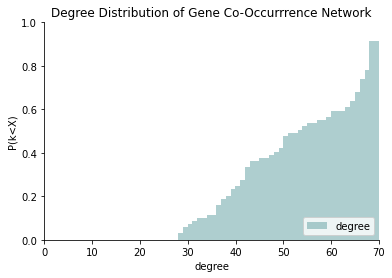

In [6]:
degs = [j for i,j in G_co.degree()]
plt.hist(degs , bins = 1000, density = True, cumulative=True, alpha = 0.5, color = "cadetblue", label = "degree")
plt.xlim(left = 0, right = max(degs))
plt.ylim(top=1)


plt.xlabel("degree")
plt.ylabel("P(k<X)")
plt.title("Degree Distribution of Gene Co-Occurrrence Network")
plt.legend(loc="lower right")
sns.despine()
plt.show()

In [7]:
print("mean degree:",G_co.size()*2/len(G_co.nodes()))

mean degree: 52.69565217391305


In [8]:
# nx.write_gml(G_co, "networks/co_occurrence_graph"+ str(gene_identifier), stringizer = str)

In [9]:
print("# of nodes:", len(G_co.nodes()))
print("# of edges:", G_co.size())

# of nodes: 69
# of edges: 1818


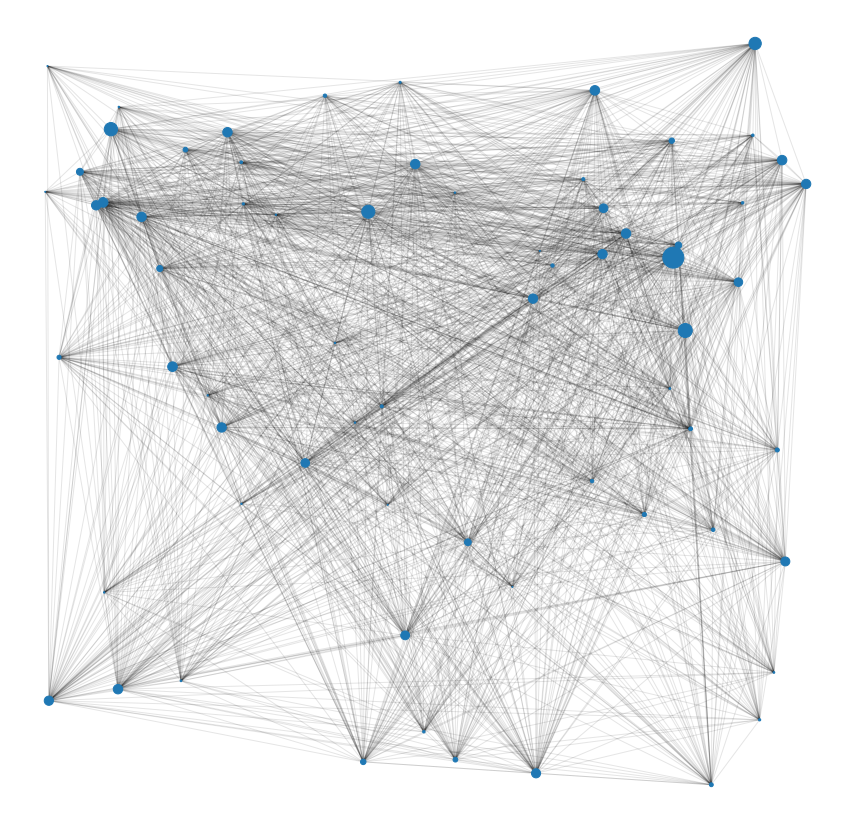

In [10]:
if  len(G_co.nodes())<120:
    pos = nx.random_layout(G_co)
    node_size = [G_co.nodes[i]["count"] for i in G_co.nodes()]
    plt.figure(figsize=(15,15))
    nx.draw_networkx_nodes(G_co,
                           pos = pos,
                           node_size = node_size
                            )
    nx.draw_networkx_edges(G_co,
                           pos = pos,
                           node_size = node_size,
                           alpha = 0.1
                           )
    sns.despine(bottom=True, left = True)
    plt.show()

<Figure size 1080x1080 with 0 Axes>

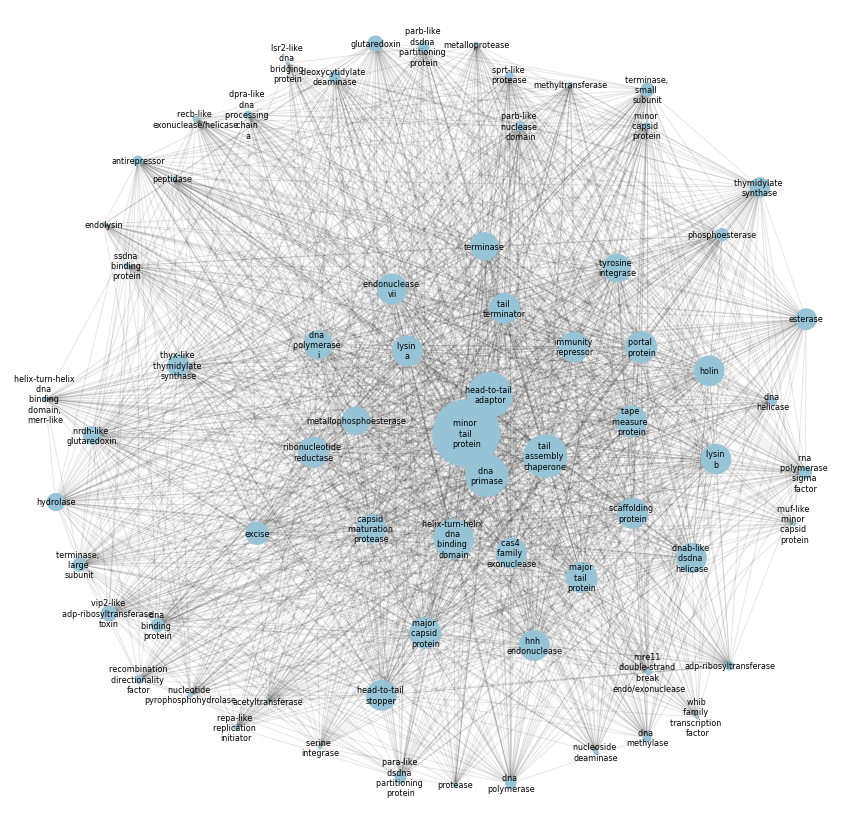

In [12]:
if  len(G_co.nodes())<120:
    plt.figure(figsize=(15,15))
    pos = nx.spring_layout(G_co, k = 10)
    node_size = [G_co.nodes[i]["count"]/len(phages)*1000 for i in G_co.nodes()]
    degree_centrality = nx.degree_centrality(G_co)
    node_color = [degree_centrality[i] for i in G_co.nodes()]
    labels = {i:i.replace(" "," \n")for i in G_co.nodes()}
    plt.figure(figsize=(15,15))
    nx.draw_networkx_nodes(G_co,
                           pos = pos,
                           node_color = "#96c4d6",
                           node_size = node_size
                            )
    nx.draw_networkx_edges(G_co,
                           pos = pos,
                           node_size = node_size,
                           alpha = 0.1
                           )
    nx.draw_networkx_labels(G_co, 
                            pos = pos, 
                            alpha = 0.99,
                           font_size=8,
                           labels=labels)
    
    sns.despine(bottom=True, left = True)
    plt.show()

# Gene Dependency Network

In [113]:
G_dep = nx.DiGraph()

# add all edges
for i,j in G_co.edges():
    # if everytime i is in a genome so is j then i is dependent on j
    if G_co.edges[i,j]["weight"] == G_co.nodes[i]["count"]: # i is depe
        G_dep.add_edge(str(i),str(j), weight=G_co.edges[i,j]["weight"])
        #print(i,"({})".format(G_co.nodes[i]["count"]),"depends on",j,"({})".format(G_co.nodes[j]["count"]))
    
    # if everytime j is in a genome so is i then j is dependent on i
    if G_co.edges[i,j]["weight"] == G_co.nodes[j]["count"]:
        G_dep.add_edge(str(j), str(i), weight=G_co.edges[i,j]["weight"])
        #print(j ,"({})".format(G_co.nodes[j]["count"]),"depends on",i,"({})".format(G_co.nodes[i]["count"]))
        
# update node attributes
for i in G_co.nodes():
    if G_dep.has_node(i):
        G_dep.nodes[i]["temperate"] = G_co.nodes[i]["temperate"]
        G_dep.nodes[i]["count"] = G_co.nodes[i]["count"]


Look at centralities to see what genes are the most 'important' or have the most dependent genes

In [114]:
in_degree_centrality = nx.in_degree_centrality(G_dep)

In [115]:
in_degree_dict = {k: v for k, v in sorted(in_degree_centrality.items(), key=lambda item: item[1], reverse=True)}

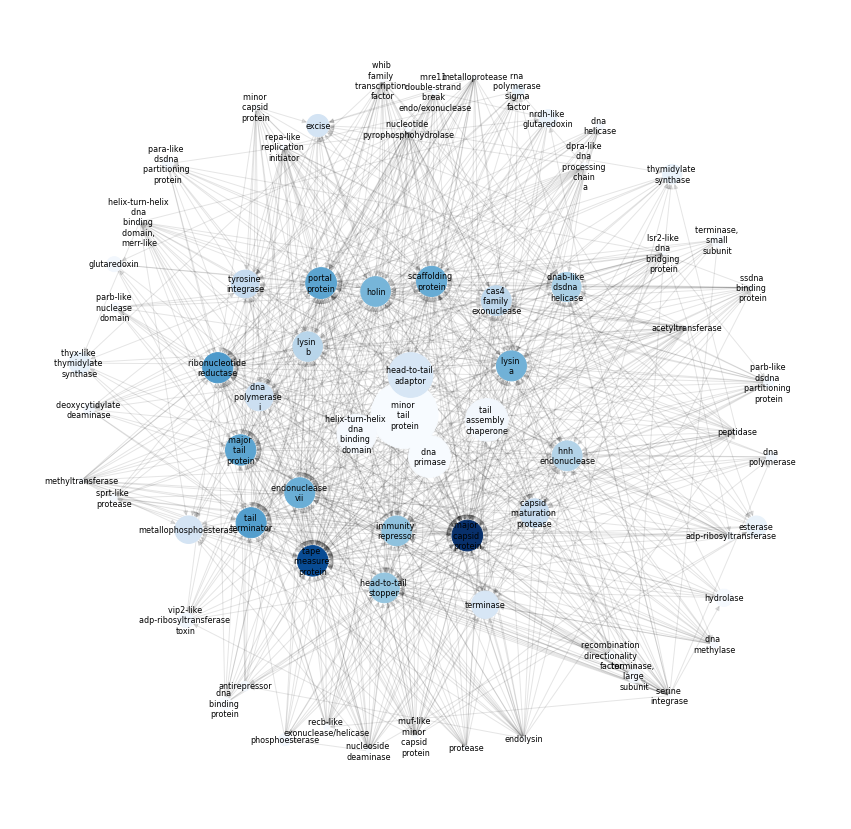

In [117]:
if  len(G_dep.nodes())<120:
#     pos = nx.spring_layout(G_co, k = 10)
    plt.figure(figsize=(10,10))
    node_size = [G_co.nodes[i]["count"]/len(phages)*1000 for i in G_dep.nodes()]
    node_color = [in_degree_centrality[i] for i in G_dep.nodes()]
    labels = {i:i.replace(" "," \n")for i in G_dep.nodes()}
    plt.figure(figsize=(15,15))
    nx.draw_networkx_nodes(G_dep,
                           node_color = node_color,
                           pos = pos,
                           node_size = node_size,
                           cmap=plt.cm.Blues
                            )
    nx.draw_networkx_edges(G_dep,
                           pos = pos,
                           node_size = node_size,
                           alpha = 0.1
                           )
    nx.draw_networkx_labels(G_dep, 
                            pos = pos, 
                            alpha = 0.99,
                           font_size=8,
                           labels=labels)
    sns.despine(bottom=True, left = True)
    plt.show()

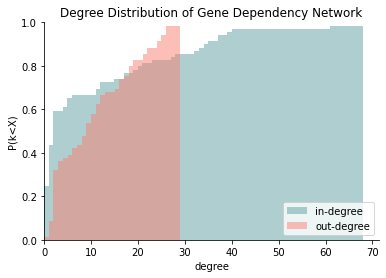

In [74]:
in_degs = [j for i,j in G_dep.in_degree()]
out_degs = [j for i,j in G_dep.out_degree()]
plt.hist(in_degs , bins = 1000, density = True, cumulative=True, alpha = 0.5, color = "cadetblue", label = "in-degree")
plt.hist(out_degs, bins = 1000, density = True, cumulative=True, alpha = 0.5, color = "salmon", label = "out-degree")
plt.xlim(left = 0)
plt.ylim(top=1)
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel("degree")
plt.ylabel("P(k<X)")
plt.title("Degree Distribution of Gene Dependency Network")
plt.legend(loc="lower right")
sns.despine()
plt.show()

In [75]:
print("# of nodes:", len(G_dep.nodes()))
print("# of edges:", G_dep.size())

degs = [j for i,j in G_dep.degree()]
print("mean degree:", np.mean(degs))
print("reciprocity:",nx.overall_reciprocity(G_dep))

# of nodes: 69
# of edges: 709
mean degree: 20.55072463768116
reciprocity: 0.0


In [76]:
depended_on = 0
dependent = 0
mixed = 0
for i in G_dep.nodes():
    if G_dep.in_degree(i) > 0 and G_dep.out_degree(i) > 0:
        mixed = 1 + mixed
    elif G_dep.in_degree(i) > 0:
        depended_on = 1 + depended_on
    elif G_dep.out_degree(i) > 0:
        dependent = 1 + dependent
print("depended_on", depended_on)
print("dependent", dependent)
print("mixed", mixed)        

depended_on 1
dependent 17
mixed 51


In [16]:
print("depended_on", depended_on/len(G_dep.nodes))
print("dependent", dependent/len(G_dep.nodes))
print("mixed", mixed/len(G_dep.nodes))   

depended_on 0.0506714180174699
dependent 0.03172395810699231
mixed 0.9176046238755378


In [17]:
# nx.write_gml(G_dep, "networks/dependency_graph"+ str(gene_identifier), stringizer = str)

How are temperate phages dependency graphs different?